<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="Victor Mono" SIZE=4>
<b> Universidad Sergio Arboleda</b>
<br>
<b> <FONT FACE="Victor Mono" SIZE=2> Escuela de Ciencias Exactas e Ingeniería</b>
<br>
<b>Machine Learning</b> - <i>Camilo Rodriguez</i>
<br>
<b>Parcial Tercer Corte</b>
<br>
<b>Autor</b> - <i>Juan José Montenegro Pulido</i>
<br>
<b>Correo</b> - <i>juan.montenegro@correo.usa.edu.co</i>
</FONT>
</div>

## Importaciónes requeridas para la ejecución del notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from google.colab import drive
import json


import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat

Monteje del Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Impresión de lso diccionarios de forma más estilizada

In [ ]:
def printDict(d):
    print(json.dumps(d,sort_keys=True, indent=4, skipkeys=True))

## Configuración del tamaño de las figuras

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 2

# Dataset 


## Exploración inicioal y separación etre test y entrenamiento

### Lectura y exploración del dataSet

In [ ]:
dataset = loadmat('/content/drive/MyDrive/mnist-original.mat')

dataset

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

Listando las llaves del DataSet

In [ ]:
list(dataset)

['__header__',
 '__version__',
 '__globals__',
 'mldata_descr_ordering',
 'data',
 'label']

Cantidad de llaves en el dataSet

In [ ]:
len(dataset)

6

### Separación entre test y entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'].T, dataset['label'][0], test_size=0.3)

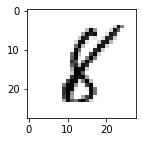

In [ ]:
img =X_train[2222].reshape(28,28)
plt.imshow(img, cmap="binary")
plt.show()

## Definición de los Pipelines para los Keras

In [ ]:
train_pipeline = Pipeline([('scaler', MinMaxScaler())])
trained_X_train = pipeline.fit_transform(X_train[2000:3500])

test_pipeline = Pipeline([('scaler', MinMaxScaler())])
trained_X_test = pipeline.fit_transform(X_test[2000:3500])

## Selección y evaluación de los modelos

### Funciones para evitar la repetición de código

In [ ]:
def train_by_classifier(clf, X_train, y_train, X_test, y_test):
    
    cvs = cross_val_score(clf, X_train[2000:3500], y_train[2000:3500], cv=10)
    fit = clf.fit(X_train[2000:3500], y_train[2000:3500])
    
    y_predict = clf.predict(X_test[2000:3500])
    accuracy = accuracy_score(y_test[2000:3500], y_predict)
    
    results = {
        'Mean': np.mean(cvs),
        'STD Deviation': np.std(cvs),
        'Res10Exec': cvs.tolist(),
        'Accuracy': accuracy,
    }

    return results

#### Ajuste de Hiperparámetros

In [ ]:
def adjust_hyperparams(grid_params,clf,X_train,y_train):
   
    gsL = GridSearchCV(clf,grid_params,cv=10)

    gsL.fit(X_train[2000:3500], y_train[2000:3500])
    
    return gsL.best_params_

### Evaluación

In [ ]:
classifiers_dict = {
    'Logistic Regression': LogisticRegression(),
    'Support Vectors': SVC(),
    'Random Forest': RandomForestClassifier(),
    'SKNN': MLPClassifier(),
}

grid_params_dict = {
    'Logistic Regression': [{ 'penalty':['l1', 'l2', 'elasticnet'], 'C' : [0.001, 0.1,10]}],
    'Support Vectors': [{ 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}],
    'Random Forest': [{ 'criterion':['gini', 'entropy'],'n_estimators':[3,5,10], 'max_samples' :[2,5,10]}],
    'SKNN': [{ 'activation':['relu', 'logistic'], 'hidden_layer_sizes':[2,3,5], 'max_iter':[10,100,10000]}],
}

models_results_dict = {}
best_hyperparams_dict = {}

In [ ]:
for clf in classifiers_dict:
    print(clf)
    models_results_dict[clf] = train_by_classifier(classifiers_dict[clf], X_train, y_train, X_test, y_test)
    best_hyperparams_dict[clf] = adjust_hyperparams(grid_params_dict[clf], classifiers_dict[clf], X_train, y_train)

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Support Vectors
Random Forest
SKNN


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [ ]:
printDict(models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.8886666666666667,
        "Mean": 0.8533333333333333,
        "Res10Exec": [
            0.8933333333333333,
            0.92,
            0.8666666666666667,
            0.82,
            0.7866666666666666,
            0.8,
            0.84,
            0.8666666666666667,
            0.8533333333333334,
            0.8866666666666667
        ],
        "STD Deviation": 0.040110957217310214
    },
    "Random Forest": {
        "Accuracy": 0.9286666666666666,
        "Mean": 0.8939999999999999,
        "Res10Exec": [
            0.8933333333333333,
            0.94,
            0.9133333333333333,
            0.8866666666666667,
            0.8266666666666667,
            0.8666666666666667,
            0.9266666666666666,
            0.8933333333333333,
            0.86,
            0.9333333333333333
        ],
        "STD Deviation": 0.034052247437659014
    },
    "SKNN": {
        "Accuracy": 0.8473333333333334,
        "Mean

In [ ]:
printDict(best_hyperparams_dict)

{
    "Logistic Regression": {
        "C": 0.001,
        "penalty": "l2"
    },
    "Random Forest": {
        "criterion": "entropy",
        "max_samples": 10,
        "n_estimators": 10
    },
    "SKNN": {
        "activation": "logistic",
        "hidden_layer_sizes": 5,
        "max_iter": 10000
    },
    "Support Vectors": {
        "kernel": "rbf"
    }
}


### Evaluación del Keras

In [ ]:
keras_model = keras.Sequential()

keras_model.add(keras.layers.Flatten(input_shape=(28,28), name='input')) 

keras_model.add(keras.layers.Dense(300, activation='relu', name='hidden1')) 
keras_model.add(keras.layers.Dense(100, activation='relu', name='hidden2')) 

keras_model.add(keras.layers.Dense(10, activation='softmax', name='output')) 

keras_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [ ]:
keras_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras_model.fit(trained_X_train, y_train[2000:3500], validation_split=0.3, epochs=15)

Epoch 1/15
33/33 [==============================] - 1s 9ms/step - loss: 1.1864 - accuracy: 0.6762 - val_loss: 0.6326 - val_accuracy: 0.7911
Epoch 2/15
33/33 [==============================] - 0s 4ms/step - loss: 0.4269 - accuracy: 0.8667 - val_loss: 0.4584 - val_accuracy: 0.8511
Epoch 3/15
33/33 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9219 - val_loss: 0.3944 - val_accuracy: 0.8844
Epoch 4/15
33/33 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9619 - val_loss: 0.4002 - val_accuracy: 0.8733
Epoch 5/15
33/33 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9762 - val_loss: 0.3499 - val_accuracy: 0.8978
Epoch 6/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0675 - accuracy: 0.9895 - val_loss: 0.3315 - val_accuracy: 0.9022
Epoch 7/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9962 - val_loss: 0.3326 - val_accuracy: 0.9111
Epoch 8/15
33/33 [==

## Evaluación final

In [ ]:
classifiers_dict = {
    'Logistic Regression': LogisticRegression(C=0.001, penalty= 'l2'),
    'Support Vectors': SVC(kernel ='rbf'),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_samples=10, n_estimators=10),
    'SKNN': MLPClassifier(activation='logistic', hidden_layer_sizes = 5, max_iter=10000),
}

best_models_results_dict = {}


for clf in classifiers_dict:
    print(clf)
    best_models_results_dict[clf] = train_by_classifier(classifiers_dict[clf], X_train, y_train, X_test, y_test)


Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Support Vectors
Random Forest
SKNN


In [ ]:
printDict(best_models_results_dict)

{
    "Logistic Regression": {
        "Accuracy": 0.882,
        "Mean": 0.8619999999999999,
        "Res10Exec": [
            0.8933333333333333,
            0.92,
            0.86,
            0.8466666666666667,
            0.7933333333333333,
            0.8,
            0.8666666666666667,
            0.88,
            0.86,
            0.9
        ],
        "STD Deviation": 0.038649421441695316
    },
    "Random Forest": {
        "Accuracy": 0.2853333333333333,
        "Mean": 0.28600000000000003,
        "Res10Exec": [
            0.26666666666666666,
            0.2733333333333333,
            0.28,
            0.35333333333333333,
            0.26,
            0.2866666666666667,
            0.36,
            0.26,
            0.24,
            0.28
        ],
        "STD Deviation": 0.03752924785343352
    },
    "SKNN": {
        "Accuracy": 0.7546666666666667,
        "Mean": 0.6719999999999999,
        "Res10Exec": [
            0.6066666666666667,
            0.7533

# Análisis Final

In [ ]:
keras_model.fit(trained_X_test, y_test[2000:3500], validation_split=0.3, epochs=15)

Epoch 1/15
33/33 [==============================] - 0s 7ms/step - loss: 0.3744 - accuracy: 0.8952 - val_loss: 0.3160 - val_accuracy: 0.8956
Epoch 2/15
33/33 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9629 - val_loss: 0.3031 - val_accuracy: 0.9044
Epoch 3/15
33/33 [==============================] - 0s 5ms/step - loss: 0.0634 - accuracy: 0.9790 - val_loss: 0.2499 - val_accuracy: 0.9089
Epoch 4/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9971 - val_loss: 0.2538 - val_accuracy: 0.9200
Epoch 5/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.2274 - val_accuracy: 0.9222
Epoch 6/15
33/33 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9267
Epoch 7/15
33/33 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2408 - val_accuracy: 0.9267
Epoch 8/15
33/33 [==